## Setting Up the Environment

In [1]:
pip install pandas numpy matplotlib seaborn plotly geopandas folium scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 6.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 28.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 27.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Data Loading and Initial Exploration

In [4]:
import pandas as pd

# Load the dataset
file_path = 'Ubereat_US_Merchant.csv'
data = pd.read_csv(file_path)

# View the first few rows
print(data.head())

   index            city state zipcode  \
0      0  Alexander City    AL   35010   
1      1     Albertville    AL   35951   
2      2  Alexander City    AL   35010   
3      3     Albertville    AL   35950   
4      4  Alexander City    AL   35010   

                                          address  \
0  4097 U S Highway 280, Alexander City, AL 35010   
1       7300 Hwy 431 North, Albertville, AL 35951   
2   4097 Us Highway 280, Alexander City, AL 35010   
3          7959 Us Hwy 431, Albertville, AL 35950   
4      977 Jefferson St, Alexander City, AL 35010   

                                 loc_name  \
0  The Saucy Hen (4097 U. S. HIGHWAY 280)   
1        Burger King (7300 Hwy 431 North)   
2    MrBeast Burger (4097 US Highway 280)   
3         Taco Bell (7959 Us Highway 431)   
4                             The Station   

                             loc_number  \
0  0623b7ac-598d-5016-bdd2-febb44d79b12   
1  62a60773-5644-4d73-b969-a4922ce70fa6   
2  308b1654-60f1-51d4-bfe2-e

In [3]:
# Check data types and missing values
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           1000 non-null   int64  
 1   city            999 non-null    object 
 2   state           1000 non-null   object 
 3   zipcode         997 non-null    object 
 4   address         1000 non-null   object 
 5   loc_name        1000 non-null   object 
 6   loc_number      1000 non-null   object 
 7   url             1000 non-null   object 
 8   promotion       110 non-null    object 
 9   latitude        1000 non-null   float64
 10  longitude       1000 non-null   float64
 11  is_open         1000 non-null   bool   
 12  closed_message  986 non-null    object 
 13  delivery_fee    3 non-null      float64
 14  delivery_time   14 non-null     object 
 15  review_count    374 non-null    float64
 16  review_rating   418 non-null    float64
 17  price_bucket    856 non-null    ob

## Data Cleaning

In [10]:
# Handle missing values: Drop rows or fill NaNs based on project goals
data_cleaned = data.dropna(subset=['review_rating', 'review_count'])

# Alternatively, you can fill missing values if it makes sense
data_cleaned['review_rating'].fillna(0, inplace=True)

# Removing duplicates (if needed)
data_cleaned = data_cleaned.drop_duplicates()

# Checking data after cleaning
print(data_cleaned.isnull().sum())


index               0
city                0
state               0
zipcode             2
address             0
loc_name            0
loc_number          0
url                 0
promotion         325
latitude            0
longitude           0
is_open             0
closed_message      5
delivery_fee      373
delivery_time     369
review_count        0
review_rating       0
price_bucket        0
img1               19
img2               19
img3               19
img4               19
img5               19
scan_date           0
TID                 0
dtype: int64


/var/folders/lt/t4bhjb2s737f5f8kmxcrx7k00000gn/T/ipykernel_8056/4138882073.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['price_bucket'] = data_cleaned['price_bucket'].astype(str)
/var/folders/lt/t4bhjb2s737f5f8kmxcrx7k00000gn/T/ipykernel_8056/4138882073.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['review_rating'].fillna(0, inplace=True)


In [21]:
# Ensure price_bucket is treated as a string
data_cleaned['price_bucket'] = data_cleaned['price_bucket'].astype(str)

# Create a new column with descriptive labels for price ranges
data_cleaned['price_bucket_label'] = data_cleaned['price_bucket'].replace({
    '$': 'Low',
    '$$': 'Medium',
    '$$$': 'High'
})

# Check unique values to confirm
print(data_cleaned['price_bucket_label'].unique())

['Medium' 'Low' 'nan' 'High']


## Exploratory Data Analysis (EDA)

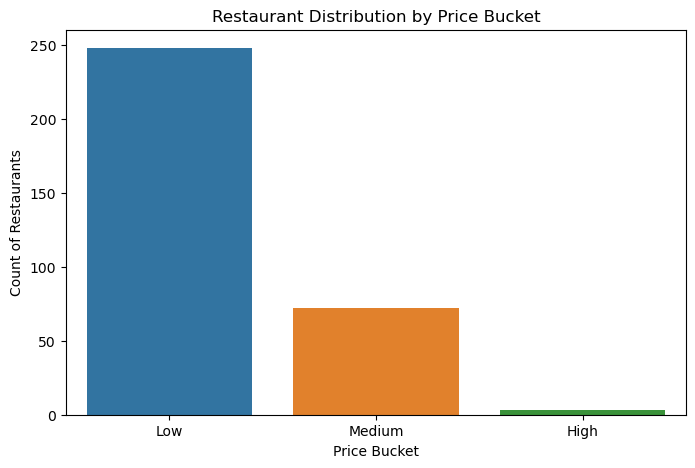

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of restaurants by price bucket (labeled)
plt.figure(figsize=(8,5))
sns.countplot(x='price_bucket_label', data=data_cleaned, order=['Low', 'Medium', 'High'])
plt.title('Restaurant Distribution by Price Bucket')
plt.xlabel('Price Bucket')
plt.ylabel('Count of Restaurants')
plt.show()


In [12]:
# Analyze promotions
promotion_data = data_cleaned['promotion'].value_counts()
print(promotion_data)

promotion
$0 Delivery Fee (Spend $20)    10
Spend $25, Save $5              7
Spend $15, Save $5              6
Spend $20, Save $5              6
Spend $35, Save $5              3
Offers                          3
Spend $15, Save $3              2
Spend $30, Save $6              2
Spend $50, Save $10             2
Spend $25, Save $8              2
$0 Delivery Fee (Spend $15)     2
Free Item (Spend $15)           1
Spend $10, Save $2              1
$0 Delivery Fee (Spend $10)     1
Spend $50, Save $5              1
Name: count, dtype: int64


## Geospatial Analysis

In [13]:
import folium

# Create a map centered around a specific location (e.g., USA)
map_us = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add restaurants as points on the map
for idx, row in data_cleaned.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['loc_name']
    ).add_to(map_us)

# Save or display the map
map_us.save('uber_eats_map.html')


## Analysis of Review Ratings and Promotions

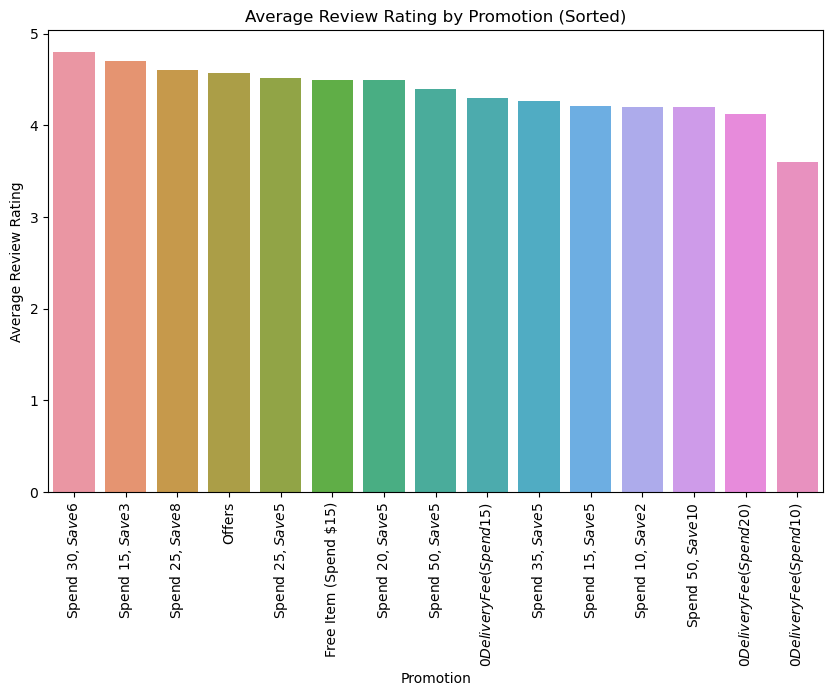

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'promotion' and calculate the average review rating
promotion_vs_rating = data_cleaned.groupby('promotion')['review_rating'].mean().reset_index()

# Sort the promotion data by average review rating in descending order
promotion_vs_rating_sorted = promotion_vs_rating.sort_values(by='review_rating', ascending=False)

# Plotting the sorted barplot
plt.figure(figsize=(10,6))
sns.barplot(x='promotion', y='review_rating', data=promotion_vs_rating_sorted)
plt.title('Average Review Rating by Promotion (Sorted)')
plt.xticks(rotation=90)
plt.ylabel('Average Review Rating')
plt.xlabel('Promotion')
plt.show()


## Price Bucket vs Review Count/Rating

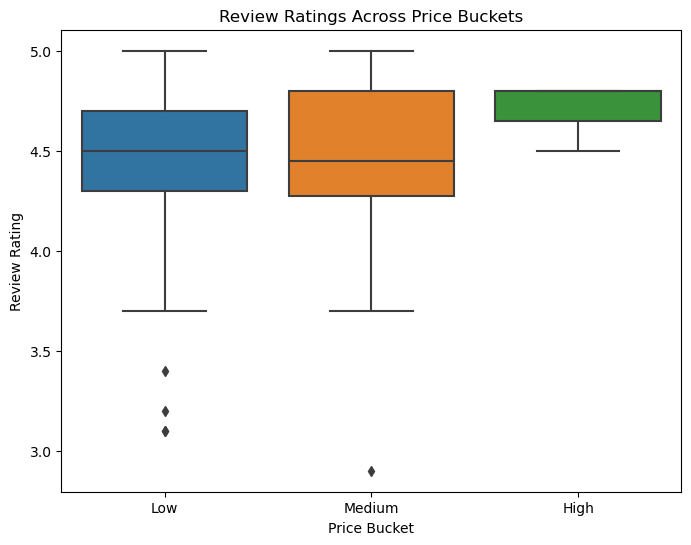

In [23]:
# Boxplot of review ratings by labeled price bucket
plt.figure(figsize=(8,6))
sns.boxplot(x='price_bucket_label', y='review_rating', data=data_cleaned, order=['Low', 'Medium', 'High'])
plt.title('Review Ratings Across Price Buckets')
plt.xlabel('Price Bucket')
plt.ylabel('Review Rating')
plt.show()

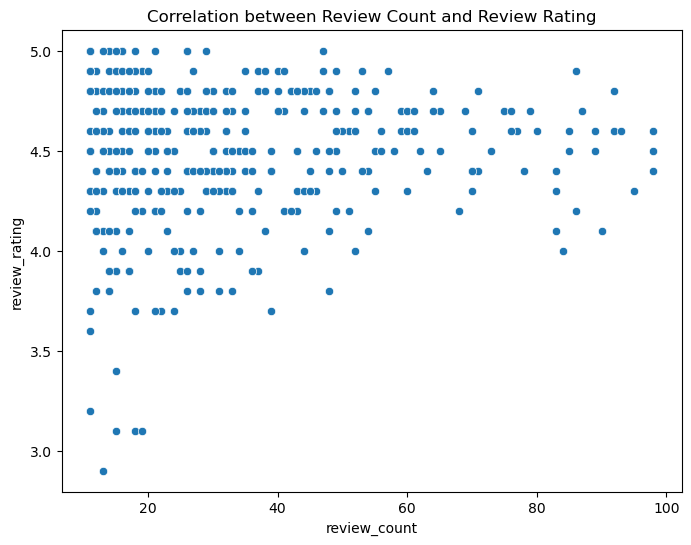

In [17]:
# Correlation between review count and rating
plt.figure(figsize=(8,6))
sns.scatterplot(x='review_count', y='review_rating', data=data_cleaned)
plt.title('Correlation between Review Count and Review Rating')
plt.show()

## Clustering

In [19]:
from sklearn.cluster import KMeans

# Selecting features for clustering (e.g., latitude, longitude, rating)
clustering_data = data_cleaned[['latitude', 'longitude', 'review_rating']].dropna()

# Fit a KMeans model
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(clustering_data)

# Add cluster labels to the original dataset
data_cleaned['cluster'] = clusters

# Visualizing clusters on a map
map_clusters = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
for idx, row in data_cleaned.iterrows():
    color = ['red', 'blue', 'green', 'purple', 'orange'][row['cluster']]
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True
    ).add_to(map_clusters)

map_clusters.save('uber_eats_clusters.html')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           1000 non-null   int64  
 1   city            999 non-null    object 
 2   state           1000 non-null   object 
 3   zipcode         997 non-null    object 
 4   address         1000 non-null   object 
 5   loc_name        1000 non-null   object 
 6   loc_number      1000 non-null   object 
 7   url             1000 non-null   object 
 8   promotion       110 non-null    object 
 9   latitude        1000 non-null   float64
 10  longitude       1000 non-null   float64
 11  is_open         1000 non-null   bool   
 12  closed_message  986 non-null    object 
 13  delivery_fee    3 non-null      float64
 14  delivery_time   14 non-null     object 
 15  review_count    374 non-null    float64
 16  review_rating   418 non-null    float64
 17  price_bucket    856 non-null    ob